In [223]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 



# READING THE FIRST DATASET


In [224]:

df = pd.read_csv('data/per-capita-plastic-waste-vs-gdp-per-capita.csv')
df.head()


,Entity,Code,Year,Per capita plastic waste (kg/person/day),"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN


In [225]:

df.shape

(48168, 7)

The columns that i am most interested here is Waste per person , GDP per capita and Continent . 

The important thing that i noticed is the dataset i have is actually in a nice format especially in the Entity Series . They are sorted alphabetically . So that's a great plus point i have. But the negative is that most of the values that i am interested in , is having a lot of null values.

In [226]:
df.rename(columns={'GDP per capita, PPP (constant 2011 international $)': 'GDP per capita in PPP', 
                   'Total population (Gapminder, HYDE & UN)': 'Total Population',
                    'Per capita plastic waste (kg/person/day)': 'Waste per person(kg/day)'}, inplace=True)
                
df

,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population,Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN
...,...,...,...,...,...,...,...
48163,Zimbabwe,ZWE,1988,NaN,NaN,9849000.0,NaN
48164,Zimbabwe,ZWE,1989,NaN,NaN,10154000.0,NaN
48165,Zimbabwe,ZWE,2018,NaN,NaN,14439000.0,NaN
48166,Zimbabwe,ZWE,2019,NaN,NaN,14645000.0,NaN


In [227]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48168 entries, 0 to 48167
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Entity                    48168 non-null  object 
 1   Code                      46154 non-null  object 
 2   Year                      48168 non-null  int64  
 3   Waste per person(kg/day)  186 non-null    float64
 4   GDP per capita in PPP     6407 non-null   float64
 5   Total Population          46883 non-null  float64
 6   Continent                 285 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 2.6+ MB


# REMOVING ROWS WHOSE TOTAL POPULATION AND GDP PER CAPITA IS NULL 

In [228]:

tpgp_df_index = df[(df['Total Population'].isna()) & (df['GDP per capita in PPP'].isna())  ].index
df.drop(tpgp_df_index,inplace=True)
df


,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population,Continent
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN
5,Afghanistan,AFG,2006,NaN,1161.124889,26433000.0,NaN
...,...,...,...,...,...,...,...
48162,Zimbabwe,ZWE,1987,NaN,NaN,9527000.0,NaN
48163,Zimbabwe,ZWE,1988,NaN,NaN,9849000.0,NaN
48164,Zimbabwe,ZWE,1989,NaN,NaN,10154000.0,NaN
48165,Zimbabwe,ZWE,2018,NaN,NaN,14439000.0,NaN


The problem here is we dont have enough data in the waste per person Series. Most of the values are Null . So we need to find out which year has most waste per person


In [229]:
# df[df["Year"] == 2005].info()
#df[df["Year"] == 2006].info()
# df[df["Year"] == 2008].info()

df[df["Year"] == 2010].info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 287 entries, 9 to 47967
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Entity                    287 non-null    object 
 1   Code                      236 non-null    object 
 2   Year                      287 non-null    int64  
 3   Waste per person(kg/day)  181 non-null    float64
 4   GDP per capita in PPP     236 non-null    float64
 5   Total Population          242 non-null    float64
 6   Continent                 0 non-null      object 
dtypes: float64(3), int64(1), object(3)
memory usage: 17.9+ KB


So from the above test on each year , Only 2010 year is having 186 non null values for per capita plastic waste. So we can actually calculate the relationship on the year 2010

In [230]:


df_2010 = df[df['Year'] == 2010]
df_2010


,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population,Continent
9,Afghanistan,AFG,2010,NaN,1614.255001,2.918600e+07,NaN
333,Africa,NaN,2010,NaN,NaN,1.039304e+09,NaN
344,Albania,ALB,2010,0.069,9927.181841,2.948000e+06,NaN
564,Algeria,DZA,2010,0.144,12870.602699,3.597700e+07,NaN
844,American Samoa,ASM,2010,NaN,NaN,5.600000e+04,NaN
...,...,...,...,...,...,...,...
47341,Western Sahara,ESH,2010,NaN,NaN,4.800000e+05,NaN
47371,World,OWID_WRL,2010,NaN,13175.933989,6.956824e+09,NaN
47503,Yemen,YEM,2010,0.103,4478.743599,2.315500e+07,NaN
47746,Zambia,ZMB,2010,NaN,3279.277161,1.360600e+07,NaN


Continent is also one column ( which is having the secondary priority ) , which we can use to visualise how each continent contributes to the waste generated. But the columns in the 2010 is actually having all the continent values as null. So we need to find out the year which actually has continent values as non null. 

In [231]:
# df[df["Year"] == 2010].info()
# df[df["Year"] == 2008].info()
# df[df["Year"] == 2005].info()
# df[df["Year"] == 2012].info()
df[df["Year"] == 2015].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287 entries, 14 to 47972
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Entity                    287 non-null    object 
 1   Code                      236 non-null    object 
 2   Year                      287 non-null    int64  
 3   Waste per person(kg/day)  0 non-null      float64
 4   GDP per capita in PPP     234 non-null    float64
 5   Total Population          242 non-null    float64
 6   Continent                 235 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 17.9+ KB


So the year 2015 is having most of the non null values for the continent column. Taking this years continent and appending it to the continent of the 2010 dataframe. So that we can analyse relationship between plastic waste generated per continent.

In [232]:
df_2010 = df_2010.drop(columns='Continent')
df_2010.shape

(287, 6)

In [233]:

df_2015 = df[df['Year'] == 2015]
df_2010['Continent'] = df_2015['Continent'].values
df_2010.head()


,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population,Continent
9,Afghanistan,AFG,2010,NaN,1614.255001,2.918600e+07,Asia
333,Africa,NaN,2010,NaN,NaN,1.039304e+09,NaN
344,Albania,ALB,2010,0.069,9927.181841,2.948000e+06,Europe
564,Algeria,DZA,2010,0.144,12870.602699,3.597700e+07,Africa
844,American Samoa,ASM,2010,NaN,NaN,5.600000e+04,Oceania


In [234]:
df_2015.head()

,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population,Continent
14,Afghanistan,AFG,2015,NaN,1809.016488,3.441400e+07,Asia
338,Africa,NaN,2015,NaN,NaN,1.182439e+09,NaN
369,Albania,ALB,2015,NaN,10970.452245,2.891000e+06,Europe
589,Algeria,DZA,2015,NaN,13724.723853,3.972800e+07,Africa
849,American Samoa,ASM,2015,NaN,NaN,5.600000e+04,Oceania


In [235]:

missing_idx = df_2010[df_2010['Continent'].isna()].index
df_2010.drop(missing_idx, inplace=True)

In [236]:

df_2010 = df_2010[df_2010['Waste per person(kg/day)'].notna()]
wa_g = df_2010.reset_index().drop('index', axis=1)
wa_g.head(181)

,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population,Continent
0,Albania,ALB,2010,0.069,9927.181841,2948000.0,Europe
1,Algeria,DZA,2010,0.144,12870.602699,35977000.0,Africa
2,Angola,AGO,2010,0.062,5897.682841,23356000.0,Africa
3,Anguilla,AIA,2010,0.252,NaN,13000.0,North America
4,Antigua and Barbuda,ATG,2010,0.660,19212.720131,88000.0,North America
...,...,...,...,...,...,...,...
176,Uruguay,URY,2010,0.252,17082.404659,3359000.0,South America
177,Vanuatu,VUT,2010,0.295,2948.032937,236000.0,Oceania
178,Venezuela,VEN,2010,0.252,16544.972055,28440000.0,South America
179,Vietnam,VNM,2010,0.103,4408.168612,87968000.0,Asia


# READING THE SECOND DATA SET

In [237]:

df2 = pd.read_csv('data/per-capita-mismanaged-plastic-waste-vs-gdp-per-capita.csv')
df2.head()

,Entity,Code,Year,Per capita mismanaged plastic waste,"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN


So we have the same Series for this dataset also , The only difference is the per capita mismanaged plastic waste is there. So we can actually merge the mismanaged plastic waste into that particular dataset for the year 2010

In [238]:

df2.rename(columns={'Per capita mismanaged plastic waste': 'Mismanaged waste per person(kg/day)',
                  'GDP per capita, PPP (constant 2011 international $)': 'GDP per capita in PPP',
                  'Total population (Gapminder, HYDE & UN)': 'Total Population'}, inplace=True)

In [239]:

df2.drop('Continent', axis=1, inplace=True)

In [240]:

df2_2010 = df2[df2["Year"] == 2010]
df2_2010.head()

,Entity,Code,Year,Mismanaged waste per person(kg/day),GDP per capita in PPP,Total Population
9,Afghanistan,AFG,2010,NaN,1614.255001,2.918600e+07
333,Africa,NaN,2010,NaN,NaN,1.039304e+09
344,Albania,ALB,2010,0.032,9927.181841,2.948000e+06
564,Algeria,DZA,2010,0.086,12870.602699,3.597700e+07
844,American Samoa,ASM,2010,NaN,NaN,5.600000e+04


In [241]:

df2_2010 = df2_2010[df2_2010['Mismanaged waste per person(kg/day)'].notna()]
w_m = df2_2010.reset_index().drop('index', axis=1)

In [242]:
w_m.head()

,Entity,Code,Year,Mismanaged waste per person(kg/day),GDP per capita in PPP,Total Population
0,Albania,ALB,2010,0.032,9927.181841,2948000.0
1,Algeria,DZA,2010,0.086,12870.602699,35977000.0
2,Angola,AGO,2010,0.045,5897.682841,23356000.0
3,Anguilla,AIA,2010,0.010,NaN,13000.0
4,Antigua and Barbuda,ATG,2010,0.051,19212.720131,88000.0


# MERGING ( INNER JOIN ) BOTH FIRST AND SECOND DATA SET

In [243]:

df_plastic_waste = pd.merge(wa_g, w_m, how='inner')      

In [244]:

df_plastic_waste.head()

,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population,Continent,Mismanaged waste per person(kg/day)
0,Albania,ALB,2010,0.069,9927.181841,2948000.0,Europe,0.032
1,Algeria,DZA,2010,0.144,12870.602699,35977000.0,Africa,0.086
2,Angola,AGO,2010,0.062,5897.682841,23356000.0,Africa,0.045
3,Anguilla,AIA,2010,0.252,NaN,13000.0,North America,0.010
4,Antigua and Barbuda,ATG,2010,0.660,19212.720131,88000.0,North America,0.051


In [245]:

''' column names '''
col_names = ['Entity','Code','Year','Waste per person(kg/day)','Mismanaged waste per person(kg/day)',
           'GDP per capita in PPP','Total Population','Continent']

df_plastic_waste = df_plastic_waste[col_names]

'''rounding the values per person'''
df_plastic_waste.iloc[:, 3:5] = np.around(df_plastic_waste[['Waste per person(kg/day)', 
                                                            'Mismanaged waste per person(kg/day)']], decimals=2)

''' changing data type '''
df_plastic_waste['Total Population'] = df_plastic_waste['Total Population'].astype(int)

In [246]:
'''Generating Total waste and Total mismanaged waste by country'''
df_plastic_waste['Total waste(kgs/year)'] = ((df_plastic_waste['Waste per person(kg/day)'] * 
                                    df_plastic_waste['Total Population']) * 365)
df_plastic_waste['Total waste mismanaged(kgs/year)'] = ((df_plastic_waste['Mismanaged waste per person(kg/day)'] * 
                                    df_plastic_waste['Total Population']) * 365)

df_plastic_waste["Ratio(Waste generated/mismanaged waste"] = df_plastic_waste["Waste per person(kg/day)"] / df_plastic_waste["Mismanaged waste per person(kg/day)"]
df_plastic_waste

,Entity,Code,Year,Waste per person(kg/day),Mismanaged waste per person(kg/day),GDP per capita in PPP,Total Population,Continent,Total waste(kgs/year),Total waste mismanaged(kgs/year),Ratio(Waste generated/mismanaged waste
0,Albania,ALB,2010,0.07,0.03,9927.181841,2948000,Europe,7.532140e+07,3.228060e+07,2.333333
1,Algeria,DZA,2010,0.14,0.09,12870.602699,35977000,Africa,1.838425e+09,1.181844e+09,1.555556
2,Angola,AGO,2010,0.06,0.04,5897.682841,23356000,Africa,5.114964e+08,3.409976e+08,1.500000
3,Anguilla,AIA,2010,0.25,0.01,NaN,13000,North America,1.186250e+06,4.745000e+04,25.000000
4,Antigua and Barbuda,ATG,2010,0.66,0.05,19212.720131,88000,North America,2.119920e+07,1.606000e+06,13.200000
...,...,...,...,...,...,...,...,...,...,...,...
176,Uruguay,URY,2010,0.25,0.02,17082.404659,3359000,South America,3.065088e+08,2.452070e+07,12.500000
177,Vanuatu,VUT,2010,0.30,0.24,2948.032937,236000,Oceania,2.584200e+07,2.067360e+07,1.250000
178,Venezuela,VEN,2010,0.25,0.02,16544.972055,28440000,South America,2.595150e+09,2.076120e+08,12.500000
179,Vietnam,VNM,2010,0.10,0.09,4408.168612,87968000,Asia,3.210832e+09,2.889749e+09,1.111111


# Top 5 Total Waste generating Countries and how is waste mismanaged for those top 5 countries. 

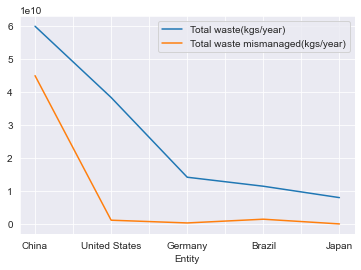

In [247]:
new_df = df_plastic_waste.groupby("Entity")[["Total waste(kgs/year)","Total waste mismanaged(kgs/year)"]].mean().nlargest(5,columns="Total waste(kgs/year)").plot()


# Avg Total Waste and Total Mismanaged waste vs Continent

<AxesSubplot:xlabel='Continent'>

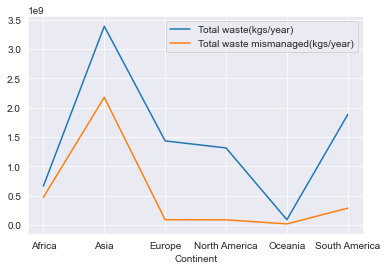

In [248]:
df_plastic_waste.groupby("Continent")[["Total waste(kgs/year)","Total waste mismanaged(kgs/year)"]].mean().plot()

# Mismanaged waste per person vs GDP per capita

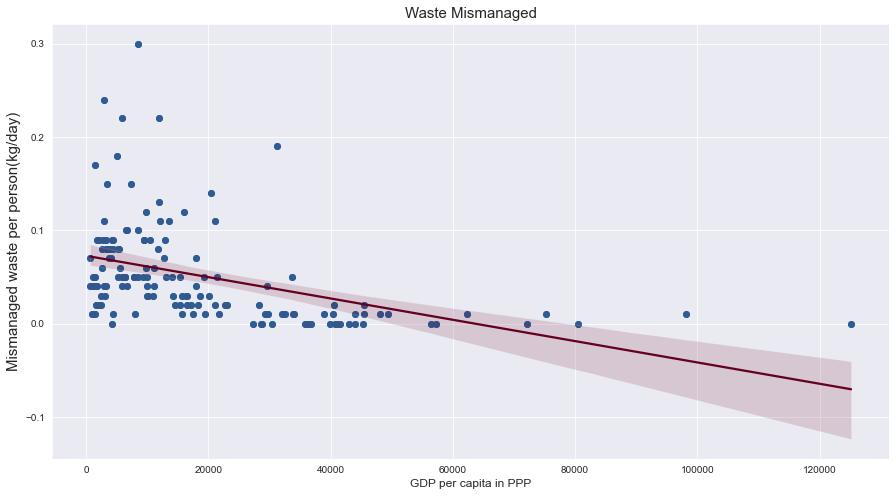

In [249]:


plt.figure(1, figsize=(15,8))
plt.scatter(df_plastic_waste['GDP per capita in PPP'], df_plastic_waste['Mismanaged waste per person(kg/day)'])
plt.title('Waste Mismanaged', loc='center', fontsize=15)
plt.ylabel('Mismanaged waste', loc='center', fontsize=15)
plt.xlabel('GDP per capita', fontsize=12)

sns.regplot(x='GDP per capita in PPP', y='Mismanaged waste per person(kg/day)', data=df_plastic_waste,
           scatter_kws={'color': '#34568B'}, line_kws={'color': '#650021'})

plt.show()


# Waste generated per person VS GDP per capita 

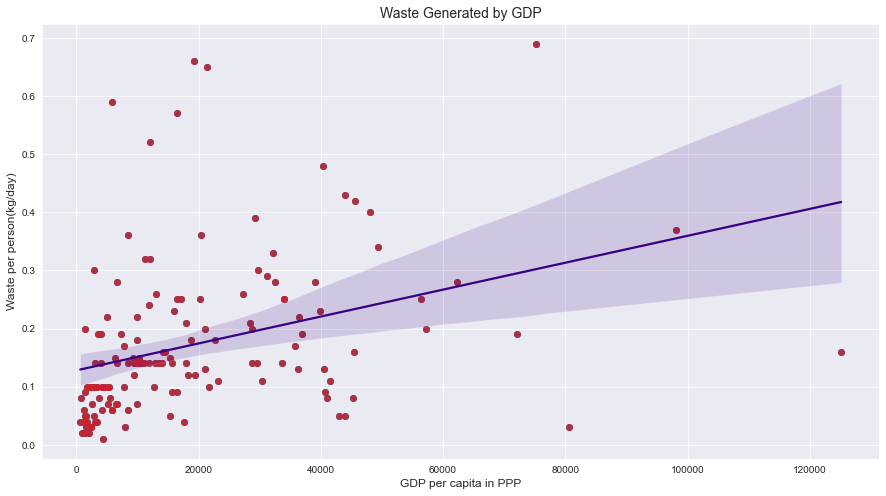

In [250]:

plt.figure(2, figsize=(15,8))
plt.scatter(df_plastic_waste['GDP per capita in PPP'], df_plastic_waste['Waste per person(kg/day)'])
plt.title('Waste Generated by GDP', loc='center', fontsize=14)
plt.ylabel('Waste per person(kg/day)', loc='center', fontsize=12)
plt.xlabel('GDP per capita in PPP', fontsize=12)

sns.regplot(x=df_plastic_waste['GDP per capita in PPP'], y=df_plastic_waste['Waste per person(kg/day)'],
           scatter_kws={'color': '#CD212A'}, line_kws={'color': '#380282'})

plt.show()

# Waste generated per person vs Mismanaged waste per person

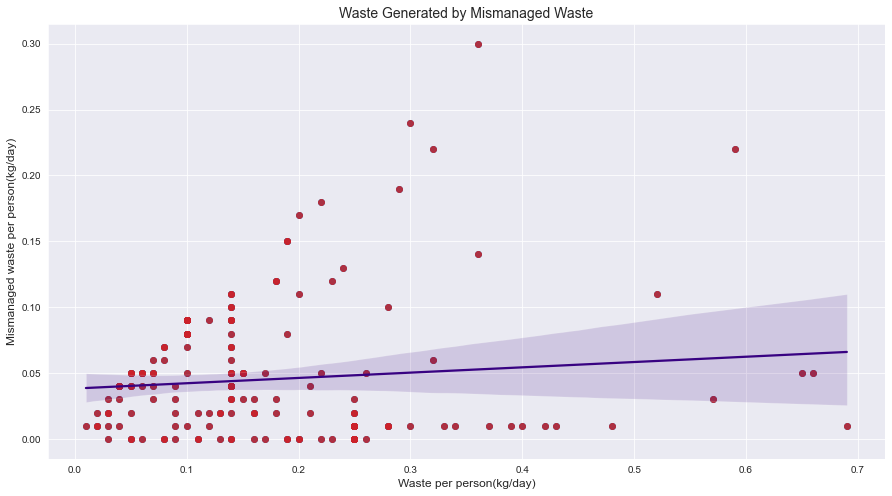

In [251]:
plt.figure(2, figsize=(15,8))
plt.scatter(df_plastic_waste['Waste per person(kg/day)'], df_plastic_waste['Mismanaged waste per person(kg/day)'])
plt.title('Waste Generated by Mismanaged Waste', loc='center', fontsize=14)
plt.ylabel('Mismanaged waste per person(kg/day)', loc='center', fontsize=12)
plt.xlabel('Waste per person(kg/day)', fontsize=12)

sns.regplot(x=df_plastic_waste['Waste per person(kg/day)'], y=df_plastic_waste['Mismanaged waste per person(kg/day)'],
           scatter_kws={'color': '#CD212A'}, line_kws={'color': '#380282'})

plt.show()